In [26]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import PIL

In [27]:
pip install Computer_Vision

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install argparse

Note: you may need to restart the kernel to use updated packages.


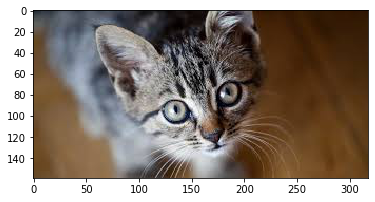

In [29]:
pic=PIL.Image.open('cats.jpg' )
plt.imshow(pic)

In [30]:
array=np.array(pic)
array.shape

(159, 318, 3)

In [31]:
if __name__ == '__main__':
    filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
 
    ap = argparse.ArgumentParser()
    ap.add_argument("-i", "--image", required=True, help="Path to the image")
    args = vars(ap.parse_args())
 
    image = cv2.imread(args["image"])
    image = gaussian_blur(image, 9, verbose=True)
    sobel_edge_detection(image, filter, verbose=True)

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

In [ ]:
def sobel_edge_detection(image,filter,verbose=False):
    new_img_x=convolutin(image,filter,verbose)
    if verbose:
        plt.imshow(new_img_x,cmap='gray')
        plt.title('horizontal edge')
        plt.show()

In [ ]:
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
from Computer_Vision.Sobel_Edge_Detection.convolution import convolution
from Computer_Vision.Sobel_Edge_Detection.gaussian_smoothing import gaussian_blur
 
 

 
 


In [33]:
def sobel_edge_detection(image, filter, verbose=False):
    new_image_x = convolution(image, filter, verbose)
 
    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()
 
    new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)
 
    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()
 
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
 
    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()
 
    return gradient_magnitude





if __name__ == '__main__':
    filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
 
    ap = argparse.ArgumentParser()
    ap.add_argument("-i", "--image", required=True, help="Path to the image")
    args = vars(ap.parse_args())
 
    image = cv2.imread(args["image"])
    image = gaussian_blur(image, 9, verbose=True)
    sobel_edge_detection(image, filter, verbose=True)

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

In [40]:
 pip install scipy==1.1.0

  Using cached scipy-1.1.0-cp37-none-win_amd64.whl (30.9 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
Note: you may need to restart the kernel to use updated packages.


ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.1.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scipy-1.4.1.dist-info\\INSTALLER'
Consider using the `--user` option or check the permissions.



In [41]:
import scipy
from scipy import ndimage

In [48]:
from scipy import misc

In [53]:
im=PIL.Image.open('cats.jpg')
plt.show(im)

In [59]:
#img=im.astype('int32')
from scipy import ndimage

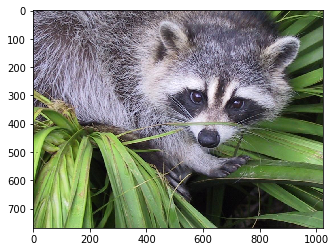

In [60]:
from scipy import misc
import imageio
f = misc.face()
imageio.imsave('cats.jpg', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [61]:
from scipy import misc
face=misc.face()

In [63]:
face = imageio.imread('cats.jpg')
face.shape

(768, 1024, 3)

In [64]:
type(face)

imageio.core.util.Array

In [65]:
dx=ndimage.sobel(face,0)

In [66]:
dx.shape

(768, 1024, 3)

In [68]:


def sobel_filter(im, k_size):

    im = im.astype(np.float)
    width, height, c = im.shape
    if c > 1:
        img = 0.2126 * im[:,:,0] + 0.7152 * im[:,:,1] + 0.0722 * im[:,:,2]
    else:
        img = im

    assert(k_size == 3 or k_size == 5);

    if k_size == 3:
        kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
        kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
    else:
        kh = np.array([[-1, -2, 0, 2, 1], 
                   [-4, -8, 0, 8, 4], 
                   [-6, -12, 0, 12, 6],
                   [-4, -8, 0, 8, 4],
                   [-1, -2, 0, 2, 1]], dtype = np.float)
        kv = np.array([[1, 4, 6, 4, 1], 
                   [2, 8, 12, 8, 2],
                   [0, 0, 0, 0, 0], 
                   [-2, -8, -12, -8, -2],
                   [-1, -4, -6, -4, -1]], dtype = np.float)

    gx = signal.convolve2d(img, kh, mode='same', boundary = 'symm', fillvalue=0)
    gy = signal.convolve2d(img, kv, mode='same', boundary = 'symm', fillvalue=0)

    g = np.sqrt(gx * gx + gy * gy)
    g *= 255.0 / np.max(g)
    
    #plt.figure()
    #plt.imshow(g, cmap=plt.cm.gray)      

    return g